In [175]:
%matplotlib inline
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [115]:
# use seaborn for tuning plots = change figure size
sns.set(rc={'figure.figsize':(9,6)})

In [116]:
events_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
submissions_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
events_train.head()



,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


# Explore dataset "events_train"

# Check 1     - count of users = 19234

In [117]:
events_train.user_id.nunique()

19234

In [118]:
# transform timestamp (unix-time) to date-time 
events_train['date'] = pd.to_datetime(events_train.timestamp, unit ='s')
events_train.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [119]:
events_train.describe()

,step_id,timestamp,user_id
count,3.480703e+06,3.480703e+06,3.480703e+06
mean,3.487358e+04,1.480288e+09,1.331468e+04
std,1.422243e+04,3.068906e+07,7.779099e+03
min,3.045600e+04,1.434341e+09,1.000000e+00
25%,3.217900e+04,1.450271e+09,6.642000e+03
50%,3.292900e+04,1.483904e+09,1.320800e+04
75%,3.348100e+04,1.507889e+09,2.014400e+04
max,1.584330e+05,1.526773e+09,2.679800e+04


In [120]:
events_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

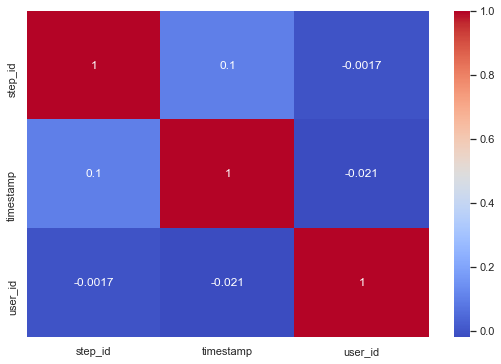

In [121]:
sns.heatmap(events_train.corr(),annot=True, cmap= 'coolwarm')

In [122]:
submissions_train.submission_status.unique()

array(['correct', 'wrong'], dtype=object)

In [123]:
events_train['day'] = events_train.date.dt.date
events_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


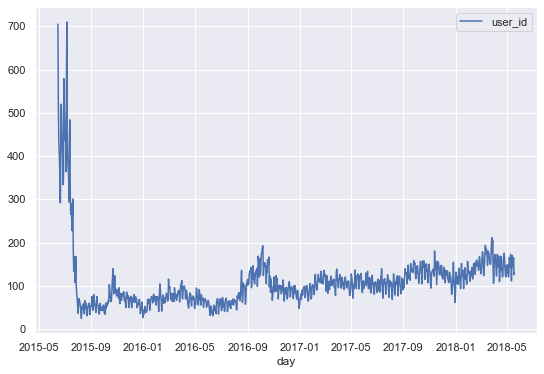

In [124]:
# count unique users per day + make a plot
events_train.groupby('day').agg({'user_id':'nunique'}).plot()

In [125]:
# group by Users id-numbers + count unique passed steps for all users_id + rename new column with count this steps 
passed_steps_per_user = events_train[events_train.action=='passed']. \
    groupby('user_id', as_index=False).\
    agg({'step_id':'nunique'}). \
    rename(columns={'step_id':'unique_passed_steps'})

passed_steps_per_user.head()

,user_id,unique_passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


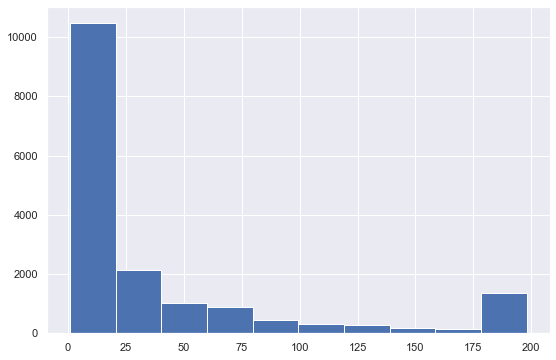

In [126]:
passed_steps_per_user.unique_passed_steps.hist()

# Check 2      - count of users = 17262 ( was - 19234, we lost 1972 who never  ever passed step)
we create new table from some data 'events_train'. And now we should check how many unique users we have in new table.



In [127]:
passed_steps_per_user.user_id.nunique()

17262

In [128]:
# columns='action', - what column  values we will use for make new columns
# values='step_id', - what column data we will count by 'aggfunc'
# aggfunc='nunique' - we count row by unique value
# fill_value=0 - if we will have rows is not matching our conditions we marked it as 0
pivot_by_users_id = events_train.pivot_table(index='user_id', \
                             columns='action', \
                             values='step_id', \
                             aggfunc='nunique', \
                             fill_value=0).\
                            reset_index()
pivot_by_users_id.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,9
2,3,91,87,29,91
3,5,11,11,2,11
4,7,1,1,0,1


# Check 3  - count of users = 19234

In [129]:
pivot_by_users_id.user_id.nunique()

19234

# Do the same things for "submissions_train"

In [130]:
submissions_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [131]:
submissions_train.submission_status.unique()

array(['correct', 'wrong'], dtype=object)

# Check 1      submissions_train.user_id = 9940

In [132]:
submissions_train.user_id.nunique()

9940

In [133]:
submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit='s' )
submissions_train.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [134]:

submissions_train['day'] = submissions_train.date.dt.date
submissions_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


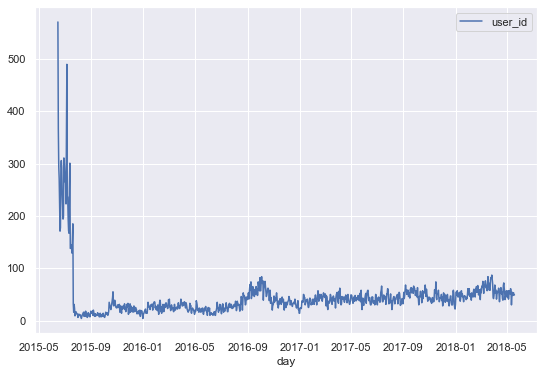

In [135]:
submissions_train.groupby('day').agg({'user_id':'nunique'}).plot()

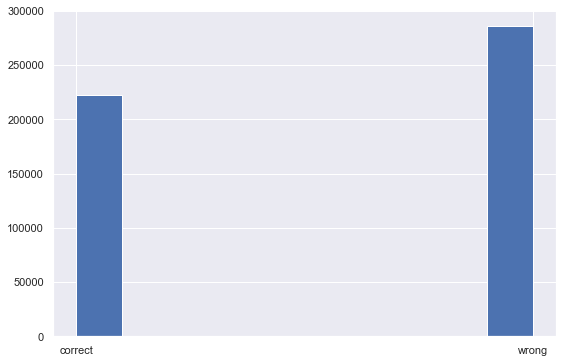

In [136]:
submissions_train.submission_status.hist(grid=True)

In [137]:
submissions_train.groupby('submission_status').agg({'submission_status':'count'})

,submission_status
submission_status,
correct,222705
wrong,286399


In [138]:
users_scores = submissions_train.pivot_table(index='user_id', columns='submission_status',\
                              values='step_id', aggfunc='count',fill_value=0).\
                                  reset_index()
pivot_sub_train.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,12
2,5,2,1
3,8,9,7
4,14,0,1


# Create dataframe for work

In [139]:
events_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [140]:
submissions_train.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


df = events_train[events_train.action =='passed'].groupby('user_id', as_index=False).\
        agg({'step_id':'nunique','day':'nunique'}).\
        rename(columns={'step_id':'count_unique_steps', 'day':'count_study_day'})
df.head()

In [141]:
events_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [142]:
# apply(list) - func 'apply' for use not Pandas functions.
# apply(np.diff) - take a different between neighboring values
gap_data = events_train[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).\
        groupby('user_id')['timestamp'].apply(list).\
        apply(np.diff).values

In [143]:
# we merge arrives to one arrive on rows/ and after that change the type to DataFrame
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data.head()

0    4843602
1    6899249
2     182484
3      93710
4    2768870
dtype: int32

In [144]:
gap_data = gap_data / (24*60*60)

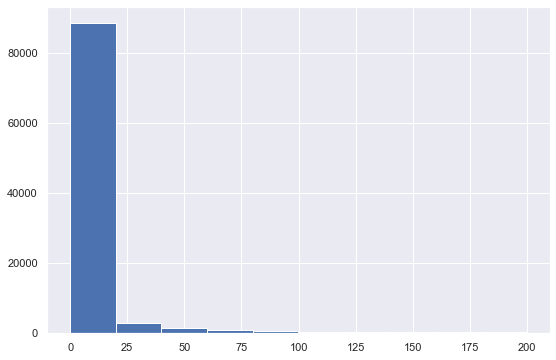

In [145]:
gap_data[gap_data<200].hist()

In [146]:
gap_data.quantile(0.95)    # 95% of users comeback to course after 59-days break 

59.760440972222156

In [147]:
# we take 30-days period for slpite users who comeback to course and users who leave it


In [148]:
pivot_sub_train[pivot_sub_train.correct == pivot_sub_train.correct.max()]

submission_status,user_id,correct,wrong
5,16,76,35
7,22,76,19
10,30,76,33
15,39,76,13
23,60,76,21
...,...,...,...
9870,26617,76,32
9871,26619,76,20
9896,26697,76,25
9929,26779,76,19


In [149]:
events_train[(events_train.step_id==30456) & (events_train.action=='viewed')].sort_values(['date'], ascending=False)

,step_id,timestamp,action,user_id,date,day
3480649,30456,1526769781,viewed,18526,2018-05-19 22:43:01,2018-05-19
3480162,30456,1526761063,viewed,13137,2018-05-19 20:17:43,2018-05-19
3479854,30456,1526758548,viewed,795,2018-05-19 19:35:48,2018-05-19
3479681,30456,1526756935,viewed,25894,2018-05-19 19:08:55,2018-05-19
3479087,30456,1526749270,viewed,22668,2018-05-19 17:01:10,2018-05-19
...,...,...,...,...,...,...
114936,30456,1434840607,viewed,22419,2015-06-20 22:50:07,2015-06-20
114922,30456,1434840304,viewed,22419,2015-06-20 22:45:04,2015-06-20
70256,30456,1434555287,viewed,22419,2015-06-17 15:34:47,2015-06-17
33866,30456,1434397993,viewed,4762,2015-06-15 19:53:13,2015-06-15


In [150]:

submissions_train[submissions_train.step_id==submissions_train.step_id.max()].groupby('submission_status').agg({'date':'min'})

,date
submission_status,
correct,2016-08-17 15:28:45
wrong,2016-08-17 16:15:16


In [151]:
pivot_1 = submissions_train.pivot_table(index= 'user_id', columns='submission_status', values= 'date', aggfunc='count')
pivot_1.sort_values('correct', ascending=True)

submission_status,correct,wrong
user_id,,
2953,1.0,NaN
17260,1.0,8.0
17245,1.0,NaN
17193,1.0,NaN
17179,1.0,1.0
...,...,...
25472,NaN,1.0
25727,NaN,1.0
25914,NaN,4.0


# Find persons who leave course (don't open course page for a 30 days)

In [152]:
users_data = events_train.groupby('user_id', as_index=False).agg({'timestamp':'max'}).rename(columns={'timestamp':'last_stamp'})
users_data.head()

,user_id,last_stamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [153]:
max_date  = events_train.timestamp.max()
drop_out_threshold = 30*24*60*60

In [154]:
users_data['is_gone_user'] = (max_date - users_data.last_stamp) > drop_out_threshold
users_data.head()

,user_id,last_stamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [155]:
# merge two datasets 
users_data = users_data.merge(users_scores, on='user_id', how='outer')
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_stamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [156]:
users_events_data = events_train.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',\
                                             fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [157]:
users_data = users_data.merge(users_events_data, on='user_id',how='outer')
users_data.head()

,user_id,last_stamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [158]:
users_days = events_train.groupby('user_id', as_index=False).agg({'day':'nunique'})
users_days.head()        # if we have Serias we can data.to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [159]:
users_data = users_data.merge(users_days, on='user_id', how='outer')


,user_id,last_stamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [161]:
users_data = users_data.rename(columns={'day':'num_working_day'})
users_data.head()

,user_id,last_stamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,num_working_day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


# Check count of user_id

In [164]:
events_train.user_id.nunique() == users_data.user_id.nunique()

True

In [165]:
users_data['passed_course'] = users_data.passed > 170

In [166]:
users_data.head()

,user_id,last_stamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,num_working_day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [167]:
users_data.groupby('passed_course').agg({'passed_course':'count'})

,passed_course
passed_course,
False,17809
True,1425


# F - function 

In [169]:
worker = [1,2,3,4]

In [174]:
print('{} {} is {}'.format(worker[0],worker[1],position))

NameError: name 'position' is not defined

# Iris predict

In [268]:
train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',  index_col=0)
train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [269]:
test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [270]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

In [271]:
# from IPython.display import SVG

# from graphviz import Source

# from IPython.display import display 

# from IPython.display import HTML

# style = "<style>svg{width:50% !important;height:30% !important;}</style>"

# HTML(style)

In [272]:
X_train = train.drop('species', axis=1)
X_test = test.drop('species', axis=1)
Y_train= train.species
Y_test = test.species
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, )

# Iris count scores

In [273]:
score_data_val = pd.DataFrame()
max_depth_val = range(1,10)
np.random.seed(0)
for max_depth in max_depth_val:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=0)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    cross_score = cross_val_score(clf,X_train, Y_train, cv=5).mean()
    temp = pd.DataFrame({'max_depth':[max_depth],
                         'train_score':[train_score],
                         'test_score':[test_score]})
#                          'cross_val_score':[cross_score]})
    score_data_val = score_data_val.append(temp)

In [274]:
score_data_val.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


# Use MELT

In [275]:
score_data_val = pd.melt(score_data_val, id_vars= ['max_depth'], value_vars= ['train_score','test_score'],
                         var_name='type_score' , value_name= 'score')

In [276]:
score_data_val.head(10)

,max_depth,type_score,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
5,6,train_score,1.00
6,7,train_score,1.00
7,8,train_score,1.00
8,9,train_score,1.00
9,1,test_score,0.60


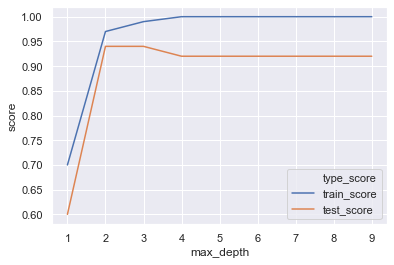

In [277]:
sns.lineplot(x= 'max_depth', y='score', hue='type_score' , data=score_data_val)

# Look for DOGS and CATS

In [303]:
df_tr = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
df_tr.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [304]:
df_tr = df_tr.rename(columns={'Длина':'len', 'Высота':'high', 'Шерстист':'wool', 'Гавкает':'bark', 'Лазает по деревьям':'climb', 'Вид':'rez'})

In [305]:
df_tr.rez.unique()

array(['собачка', 'котик'], dtype=object)

In [306]:
df_tr = df_tr.replace('собачка',1).replace('котик',0)
df_tr.head(20)

,len,high,wool,bark,climb,rez
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1
5,26,31.2,1,0,0,1
6,20,24.0,1,1,0,1
7,23,27.6,1,1,0,1
8,21,25.2,1,1,0,1
9,28,33.6,1,1,0,1


In [307]:
X_train = df_tr.drop('rez',axis=1)
y_train = df_tr.rez

In [308]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [309]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [319]:
df_test = pd.read_json('C:/Data/kaggle/stepik/dataset_209691_15.txt')
df_test = df_test.rename(columns={'Длина':'len', 'Высота':'high', 'Шерстист':'wool', 'Гавкает':'bark', 'Лазает по деревьям':'climb'})

In [320]:
X_rez = df_test
X_rez.head()

,len,high,wool,bark,climb
0,23,27.6,1,1,0
1,33,39.6,1,1,0
2,31,37.2,1,1,0
3,19,22.8,1,1,0
4,20,24.0,0,1,0


In [321]:
rez = clf.predict(X_rez)

In [322]:
rez.sum()

52